<h1> 1. Chargement des données   </h1>

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
%pylab inline
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.lines as mlines
from numpy.core.umath_tests import inner1d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold
import xgboost as xgb
from xgboost import plot_importance, to_graphviz
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dropout, Dense
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score   
from minisom import MiniSom

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [3]:
dataset=pd.read_excel('c_fraud_transaction.xlsx')

In [4]:
dataset.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,16,CASH_IN,171267.01,C342385813,91788.00,263055.01,C1326285041,130023.06,0.00,0,0
1,13,CASH_OUT,15149.15,C1819823204,158857.00,143707.85,C1828290290,0.00,15149.15,0,0
2,12,CASH_OUT,118064.98,C1030324341,2709701.00,2591636.02,C242783599,187337.43,305402.40,0,0
3,11,CASH_IN,122327.22,C1409524889,5297757.38,5420084.59,C1276977413,250489.72,128162.50,0,0
4,11,CASH_IN,129449.30,C818391416,177.00,129626.30,C189856885,261301.81,272398.17,0,0
5,17,CASH_OUT,109365.10,C1937809829,0.00,0.00,C148229552,207150.29,520523.85,0,0
6,21,CASH_IN,209920.22,C489937212,2655286.15,2865206.37,C2060095351,416664.88,206744.66,0,0
7,14,PAYMENT,5467.13,C1791489057,315.00,0.00,M1116606077,0.00,0.00,0,0
8,22,TRANSFER,116959.85,C792428306,0.00,0.00,C1001569598,550850.91,667810.76,0,0
9,20,CASH_IN,372582.92,C110996816,2352588.98,2725171.90,C2078879285,647706.15,275123.23,0,0


In [5]:
dataset.shape

(22215, 11)

In [6]:
random.seed(1)
index_permuta=random.permutation(len(dataset))
dataset=dataset.iloc[index_permuta]

In [7]:
# Affichage des 10 premières lignes du dataset
dataset.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
20654,17,PAYMENT,3110.69,C1192817005,184355.06,181244.37,M1378783631,0.00,0.00,0,0
8198,42,PAYMENT,4955.95,C1337270541,0.00,0.00,M548904968,0.00,0.00,0,0
2858,8,CASH_OUT,140116.48,C1975423113,0.00,0.00,C66893623,247156.54,532921.62,0,0
2052,10,PAYMENT,7970.42,C1083488235,10071.00,2100.58,M940748568,0.00,0.00,0,0
21413,32,TRANSFER,2023920.09,C306405849,2023920.09,0.00,C193080093,0.00,0.00,1,0
20301,20,CASH_IN,33670.80,C607382592,144739.00,178409.80,C2047619354,1773208.28,1739537.48,0,0
12061,94,CASH_OUT,299919.71,C730376461,0.00,0.00,C872848343,694805.84,994725.55,0,0
20237,13,CASH_OUT,249045.05,C427440835,13635.12,0.00,C853781603,289461.64,538506.68,0,0
415,44,CASH_OUT,309904.46,C940965545,0.00,0.00,C1030111655,343438.71,952164.98,0,0
1385,36,CASH_IN,69879.15,C1689469224,5161977.64,5231856.79,C1218763020,397179.14,327299.99,0,0


<h1> 2. Exploration et nettoyage des données</h1>

* L'idée c'est d'avoir des données propres afin d'avoir un modèle précis
* Ma variable dépendante c'est Y='isFraud', l'exploration et le nettoyage me permet de choisir les variables indépendantes optimales pour faire mon modèle 
* La solution de mon problème est binaire, je souhaite utiliser une régression logistique, un SVM (Support Vector Machine), un random forest et un XGBoost, puis des modèles de deep learning

In [8]:
# Combien y a-t-il de lignes ou colonnes dans mon dataset ?
print('Le dataset a {} lignes et {} colonnes.'.format(dataset.shape[0], dataset.shape[1]))

Le dataset a 22215 lignes et 11 colonnes.


In [9]:
# Quelles sont les différentes variables dans le dataset ?
print('Les différents types de variables sont : {}.'.format(dataset.columns.tolist()))

Les différents types de variables sont : ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'].


Existe-t-il des variables non renseignées totalement ?

In [10]:
dataset.isnull().values.any()

False

In [11]:
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

* Toutes les variables sont totalement renseignées, aucune valeur manquante en apparence dans le dataset.

Mon dataset est-il bien renseigné malgré l'absence de NaN (Not a Number) ?

Le préfixe M dans les names, 'nameOrig' pour les comptes à l'origine de la transaction ou 'nameDest' pour les comptes destinataires de l'argent, signifie marchand. 

In [12]:
print('Y a-t-il des marchands parmi les comptes à l\'origine des transactions ? {}'.format(\
      dataset.nameOrig.str.contains('M').any())) 

Y a-t-il des marchands parmi les comptes à l'origine des transactions ? False


In [13]:
print('Y a-t-il des marchands parmi les comptes destinataires de transactions de type CASH_OUT ? {}'.format(\
      (dataset.loc[dataset.type == 'CASH_OUT'].nameDest.str.contains('M')).any())) 

Y a-t-il des marchands parmi les comptes destinataires de transactions de type CASH_OUT ? False


In [14]:
print('Y a-t-il des marchands parmi les comptes destinataires de transactions autre que pour le PAYMENT ? {}'.format(\
      (dataset.loc[dataset.nameDest.str.contains('M')].type != 'PAYMENT').any()))

Y a-t-il des marchands parmi les comptes destinataires de transactions autre que pour le PAYMENT ? False


* Parmi les étiquettes nameOrig et nameDest, le mame avec le préfixe 'M' se comporte d'une manière attendue. Nous n'intégrerons pas les variables nameDest et nameOrig dans nos analyses.

La variable 'isFlaggedFraud' peut-elle être représentative de notre modèle ? 
Si le 1 est indiqué dans la colonne 'isFlaggedFraud', cela signifie qu'un transfert a été supérieur à un montant de 200 000.

In [15]:
datasetTransfer = dataset.loc[dataset.type == 'TRANSFER']
print('Le montant maximum d\'un transfert est =\
 {}, donc supérieur au montant légal.'.format(datasetTransfer.amount.max())) 

Le montant maximum d'un transfert est = 10000000.0, donc supérieur au montant légal.


In [16]:
print('Or cette variable ne possède pas de valeurs différentes de {}.'.format(\
dataset[dataset['isFlaggedFraud']!=0].shape[0]))

Or cette variable ne possède pas de valeurs différentes de 0.


* La ligne de code précédente montre bien que toutes les valeurs de la variable 'isFlaggedFraud' sont mis à False, chose étonnante car au-delà d'une certaine somme la transaction devrait etre illégale
* Fraude ou pas cette valeur est la même, chose anormale
* Cette valeur ne peut pas être représentative du modèle

Conclusion : nous n'intégrerons pas les colonnes 'isFlaggedFraud', 'nameDest' et 'nameOrig' pour notre modèle.

 Nombre de transactions selon son type :

In [17]:
def Nombre(x, df, couleur):
    ax = sns.countplot(x,data=df, palette=couleur)
    ax.set_ylabel('nombre')
    ax.set_xlabel('type de transaction')
    plt.title('nombre de transactions selon son type')
    
    return ax

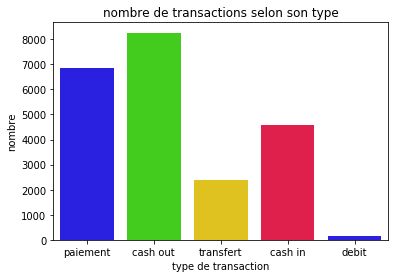

In [18]:
ax = Nombre(x='type', df=dataset, couleur='prism')
ax.set_xticklabels(['paiement', 'cash out', 'transfert', 'cash in', 'debit'])
plt.show()

In [19]:
Fraud=dataset[dataset['isFraud']==1]
NotFraud=dataset[dataset['isFraud']!=1]

# nombre de transactions frauduleuses
print('Il y a',Fraud.shape[0],'transactions frauduleuses.')
# nombre de transactions non frauduleuses
print('Il y a',NotFraud.shape[0],'transactions non frauduleuses.')

Il y a 1372 transactions frauduleuses.
Il y a 20843 transactions non frauduleuses.


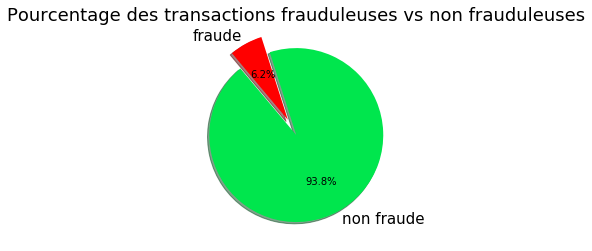

In [20]:
pourcentage_fraude = round(len(Fraud) / len(dataset) * 100, 2)
pourcentage_non_fraude = round(len(NotFraud) / len(dataset) * 100, 2)

fig1, ax1 = plt.subplots()

plt.title("Pourcentage des transactions frauduleuses vs non frauduleuses", fontsize=18)
labels = ['non fraude', 'fraude']
sizes = [pourcentage_non_fraude, pourcentage_fraude]
explode = (0, 0.2)  # seulement détacher le second groupe

patches, texts, autotexts = ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', shadow = True, explode=explode, startangle=130, colors = ['#00e64d', 'r'])
texts[0].set_fontsize(15)
texts[1].set_fontsize(15)

matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams["font.size"] = 18
plt.rcParams["figure.figsize"] = [6, 6]

transactions non frauduleuses : 3312030636.75
transactions frauduleuses     : 1487436583.61


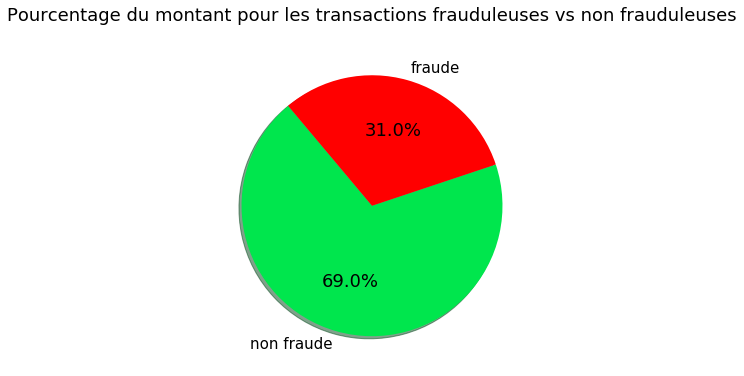

In [21]:
pourcentage_fraude = round(Fraud['amount'].sum() / dataset['amount'].sum() * 100, 2)
pourcentage_non_fraude = round(NotFraud['amount'].sum() / dataset['amount'].sum() * 100, 2)

fig1, ax1 = plt.subplots()

plt.title("Pourcentage du montant pour les transactions frauduleuses vs non frauduleuses", fontsize=18, y=1.05)
labels = ['non fraude', 'fraude']
sizes = [pourcentage_non_fraude, pourcentage_fraude]

patches, texts, autotexts = ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', shadow = True, startangle=130, colors = ['#00e64d', 'r'])
texts[0].set_fontsize(15)
texts[1].set_fontsize(15)

matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams["font.size"] = 18
plt.rcParams["figure.figsize"] = [6, 6]

print('transactions non frauduleuses :', NotFraud['amount'].sum())
print('transactions frauduleuses     :', Fraud['amount'].sum())

Quels types de transactions sont concernés par les fraudes ?

In [22]:
print('Le type de transactions frauduleuses sont : {}.'.format(\
list(dataset.loc[dataset.isFraud == 1].type.drop_duplicates().values)))

datasetFraudTransfer = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'TRANSFER')]
datasetFraudCashout = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'CASH_OUT')]

print('Le nombre de transactions frauduleuses de type transfert = {}.'.\
       format(len(datasetFraudTransfer))) 

print('Le nombre de transactions frauduleuses de type cash_out = {}.'.\
       format(len(datasetFraudCashout))) 

Le type de transactions frauduleuses sont : ['TRANSFER', 'CASH_OUT'].
Le nombre de transactions frauduleuses de type transfert = 684.
Le nombre de transactions frauduleuses de type cash_out = 688.


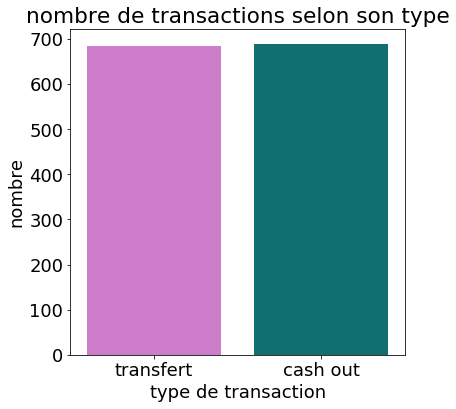

In [23]:
ax = Nombre(x='type', df=Fraud, couleur=['orchid', 'teal'])
ax.set_xticklabels(['transfert', 'cash out'])
plt.show()

In [24]:
print('Y a-t-il un transfert frauduleux et cash out frauduleux ? {}'.\
format(datasetFraudTransfer.nameDest.isin(datasetFraudCashout.nameOrig).any()))

Y a-t-il un transfert frauduleux et cash out frauduleux ? False


In [25]:
datasetNotFraudCashout = dataset.loc[(dataset.isFraud == 0) & (dataset.type == 'CASH_OUT')]
print('Y a-t-il un transfert frauduleux et cash out non frauduleux ? : {}'.\
format(datasetFraudTransfer.nameDest.isin(datasetNotFraudCashout.nameOrig).any()))

Y a-t-il un transfert frauduleux et cash out non frauduleux ? : False


In [26]:
print('transactions non frauduleuses :', datasetFraudCashout['amount'].sum())
print('transactions frauduleuses     :', datasetFraudTransfer['amount'].sum())

transactions non frauduleuses : 742973588.81
transactions frauduleuses     : 744462994.8000001


In [27]:
# Dans notre nouveau dataFrame on ne garde que les transactions de type 'TRANSFER' ou 'CASH_OUT'
dat=dataset.loc[(dataset.type=='TRANSFER')|(dataset.type=='CASH_OUT')].copy()
print('Le dataset, en sélectionant les colonnes \'TRANSFER\' et \'CASH_OUT\', a {} lignes et {} colonnes.'.format(dat.shape[0], dat.shape[1]))

Le dataset, en sélectionant les colonnes 'TRANSFER' et 'CASH_OUT', a 10640 lignes et 11 colonnes.


In [28]:
""" Transformation des valeurs de la variable type en 1 et 0 pas besoin d'utiliser le module sklearn car on peut le 
faire directement """
dat['type'] = np.where(dat['type'] == 'TRANSFER', 1, 0)
dat = dat.reset_index(drop=True)
dat.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,8,0,140116.48,C1975423113,0.00,0.0,C66893623,247156.54,532921.62,0,0
1,32,1,2023920.09,C306405849,2023920.09,0.0,C193080093,0.00,0.00,1,0
2,94,0,299919.71,C730376461,0.00,0.0,C872848343,694805.84,994725.55,0,0
3,13,0,249045.05,C427440835,13635.12,0.0,C853781603,289461.64,538506.68,0,0
4,44,0,309904.46,C940965545,0.00,0.0,C1030111655,343438.71,952164.98,0,0


In [29]:
# Supprimons les variables peu représentatives
dat.drop(['nameOrig','isFlaggedFraud','nameDest'],1,inplace=True)
dat.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,8,0,140116.48,0.00,0.0,247156.54,532921.62,0
1,32,1,2023920.09,2023920.09,0.0,0.00,0.00,1
2,94,0,299919.71,0.00,0.0,694805.84,994725.55,0
3,13,0,249045.05,13635.12,0.0,289461.64,538506.68,0
4,44,0,309904.46,0.00,0.0,343438.71,952164.98,0


In [30]:
def PlotPoints(x, y, h):
    ax = sns.stripplot(x, y, h, dodge = True);
    ax.set_xticklabels(['non frauduleux', 'frauduleux'], size = 16)
    ax.set_xlabel('type de fraude', size = 16)
    
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles, ['cash out', 'transfert'], bbox_to_anchor=(1, 1), loc=0, borderaxespad=2, fontsize = 16)
    
    return ax

In [31]:
limit = len(dat)

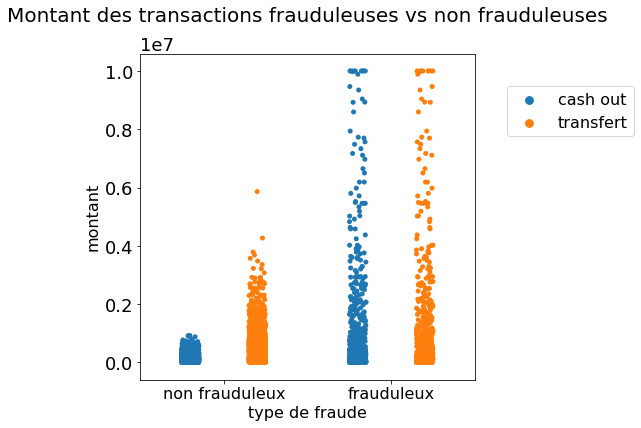

In [32]:
ax = PlotPoints(dat.isFraud[:limit], dat.amount[:limit], dat.type[:limit])
ax.set_ylabel('montant', size = 16)
ax.set_title('Montant des transactions frauduleuses vs non frauduleuses', size = 20, y = 1.08);

In [33]:
#NotFraud[(NotFraud['amount']>1000000)&(NotFraud['amount']>2000000)].shape[0]

In [34]:
Fraud=dat[dat['isFraud']==1]
NotFraud=dat[dat['isFraud']!=1]

credit=Fraud.loc[(Fraud.oldbalanceDest == 0) & (Fraud.newbalanceDest == 0) & (Fraud.amount != 0)].shape[0]
debit=Fraud.loc[(Fraud.oldbalanceOrg == 0) & (Fraud.newbalanceOrig == 0) & (Fraud.amount != 0)].shape[0]
# pourcentage des valeurs manquantes dans les transactions frauduleuses cotés debiteurs
debit_manquant_pourcent=100*debit/Fraud.shape[0]
print('Dans les transactions frauduleuses, les comptes débiteurs représentent'\
      ,round(debit_manquant_pourcent,2),'%','des valeurs manquantes')
# pourcentage des valeurs manquantes dans les transactions frauduleuses cotés créditeurs
credit_manquant_pourcent=100*credit/Fraud.shape[0]
print('alors que les comptes créditeurs représentent',round(credit_manquant_pourcent,2),'%','des valeurs manquantes.')

Dans les transactions frauduleuses, les comptes débiteurs représentent 1.97 % des valeurs manquantes
alors que les comptes créditeurs représentent 46.87 % des valeurs manquantes.


In [35]:
credit=NotFraud.loc[(NotFraud.oldbalanceDest == 0) & (NotFraud.newbalanceDest == 0) & (NotFraud.amount != 0)].shape[0] # à changer
debit=NotFraud.loc[(NotFraud.oldbalanceOrg == 0) & (NotFraud.newbalanceOrig == 0) & (NotFraud.amount != 0)].shape[0]
# pourcentage des valeurs manquantes dans les transactions frauduleuses cotés debiteurs
debit_manquant_pourcent=100*debit/NotFraud.shape[0] 
print('Dans les transactions non frauduleuses, les comptes débiteurs représentent'\
      ,round(debit_manquant_pourcent,2),'%','des valeurs manquantes')
# pourcentage des valeurs manquantes dans les transactions frauduleuses cotés créditeurs
credit_manquant_pourcent=100*credit/NotFraud.shape[0]
print('alors que les comptes créditeurs représentent',round(credit_manquant_pourcent,2),'%','des valeurs manquantes.')

Dans les transactions non frauduleuses, les comptes débiteurs représentent 47.19 % des valeurs manquantes
alors que les comptes créditeurs représentent 0.18 % des valeurs manquantes.


* Le résultat précédent nous montre que le traitement des valeurs manquantes dépendra des comptes débiteurs ou créditeurs et selon que la transaction soit frauduleuse ou non.

Traitement des valeurs manquantes

In [120]:
def BoxPlot(df) :
    ax1 = df.boxplot(column=['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])
    ax1.set_ylabel('montant')

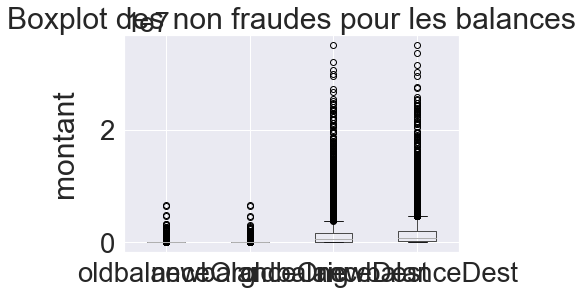

In [121]:
ax1 = BoxPlot(NotFraud)
plt.title('Boxplot des non fraudes pour les balances')
plt.show()

In [38]:
dat.median()

step                  21.000
type                   0.000
amount            182419.655
oldbalanceOrg       5455.500
newbalanceOrig         0.000
oldbalanceDest    425483.790
newbalanceDest    758279.580
isFraud                0.000
dtype: float64

In [39]:
dat.mean()

step              2.871560e+01
type              2.235902e-01
amount            3.707199e+05
oldbalanceOrg     1.918619e+05
newbalanceOrig    2.587656e+04
oldbalanceDest    1.340951e+06
newbalanceDest    1.721275e+06
isFraud           1.289474e-01
dtype: float64

In [40]:
"""
Les valeurs manquantes crédits on le remplace par -1 car il y avait plus des transactions frauduleuses qui avaient des valeurs 
manquantes pour les comptes crédits, cela permet à l'algorithme de differencier
"""
dat.loc[(dat.oldbalanceDest == 0) & (dat.newbalanceDest == 0) & (dat.amount != 0), \
      ['oldbalanceDest', 'newbalanceDest']] = - 1

In [41]:
# les valeurs manquantes debits on le remplace par 'NaN'
dat.loc[(dat.oldbalanceOrg == 0) & (dat.newbalanceOrig == 0) & (dat.amount != 0), \
      ['oldbalanceOrg', 'newbalanceOrig']] = np.nan
# les 'NaN' sont à leur tour remplacées par les valeurs medianes
dat[['oldbalanceOrg','newbalanceOrig']]=dat[['oldbalanceOrg','newbalanceOrig']].fillna(dat.median())

Après nettoyage et traitement des valeurs manquantes, je vérifie si mes variables explicatives sont indépendantes entre elles.

In [42]:
dat_c = dat.loc[:, dat.columns != 'isFraud']

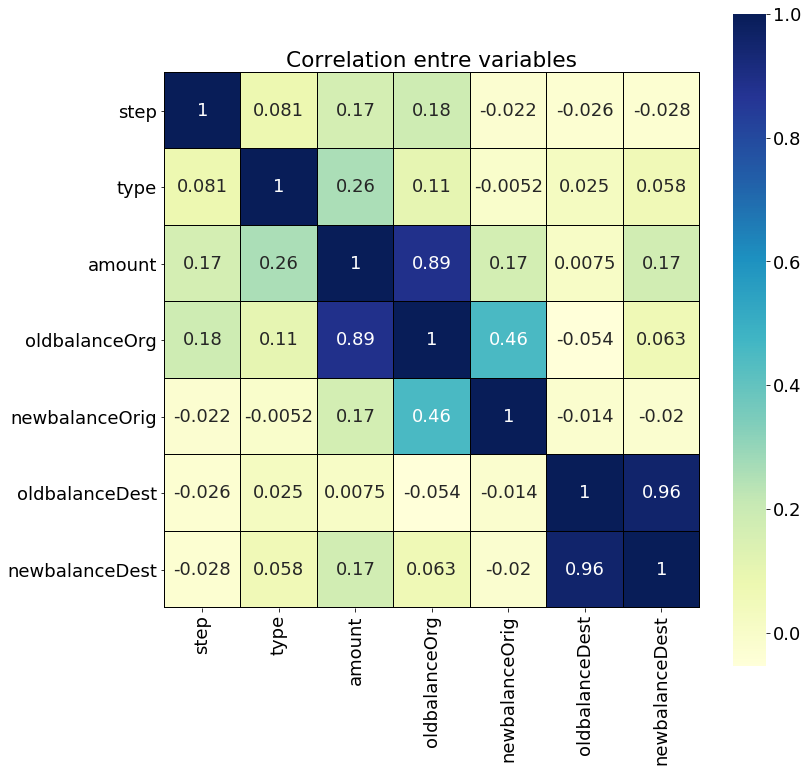

In [43]:
# affichage des corrélations entre variables
f, ax = plt.subplots(figsize=(12, 12))
plt.title('Correlation entre variables')
sns.heatmap(dat_c.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True);

* Il y a une très forte corrélation entre oldbalanceOrg et amount d'une part et oldbalanceDest et newbalanceDest d'autre part.

* On ne peut pas faire un modèle avec des variables qui ne sont pas indépendantes.

* Nous allons créer deux variables qui seront chacune une combinaison linéaire des deux variables corréelées et du montant de la transaction.

In [44]:
d_model=pd.DataFrame(dat)
d_model['errorBalanceSender'] = d_model.oldbalanceOrg  - d_model.amount - d_model.newbalanceOrig
d_model['errorBalanceReceiver'] = d_model.oldbalanceDest + d_model.amount - d_model.newbalanceDest
d_model.drop(['oldbalanceOrg', 'oldbalanceDest'], 1, inplace=True)
d_model = d_model.rename(columns={'newbalanceOrig':'balanceSender', 'newbalanceDest':'balanceReceiver'})



#d_model['noErrors'] = np.where((d_model['errorBalanceSender'] == 0) & (d_model['errorBalanceReceiver'] == 0), 1, 0)
d_model.head(5)

,step,type,amount,balanceSender,balanceReceiver,isFraud,errorBalanceSender,errorBalanceReceiver
0,8,0,140116.48,0.0,532921.62,0,-98440.48,-145648.60
1,32,1,2023920.09,0.0,-1.00,1,0.00,2023920.09
2,94,0,299919.71,0.0,994725.55,0,-258243.71,0.00
3,13,0,249045.05,0.0,538506.68,0,-235409.93,0.01
4,44,0,309904.46,0.0,952164.98,0,-268228.46,-298821.81


In [45]:
#d_model['noErrors'].value_counts()

* Après création des nouvelles variables, je vérifie à nouveau l'indépendance des variables.

In [46]:
d_model_c = d_model.loc[:, d_model.columns != 'isFraud']

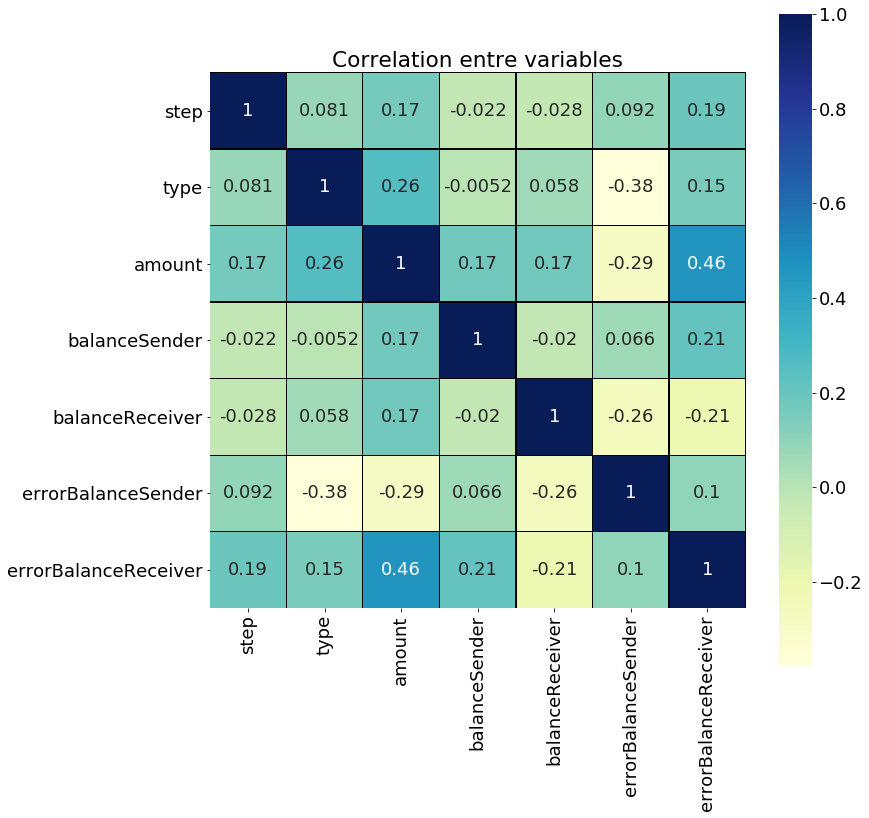

In [47]:
# affichage des corrélations entre variables
f, ax = plt.subplots(figsize=(12, 12))
plt.title('Correlation entre variables')
sns.heatmap(d_model_c.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True);

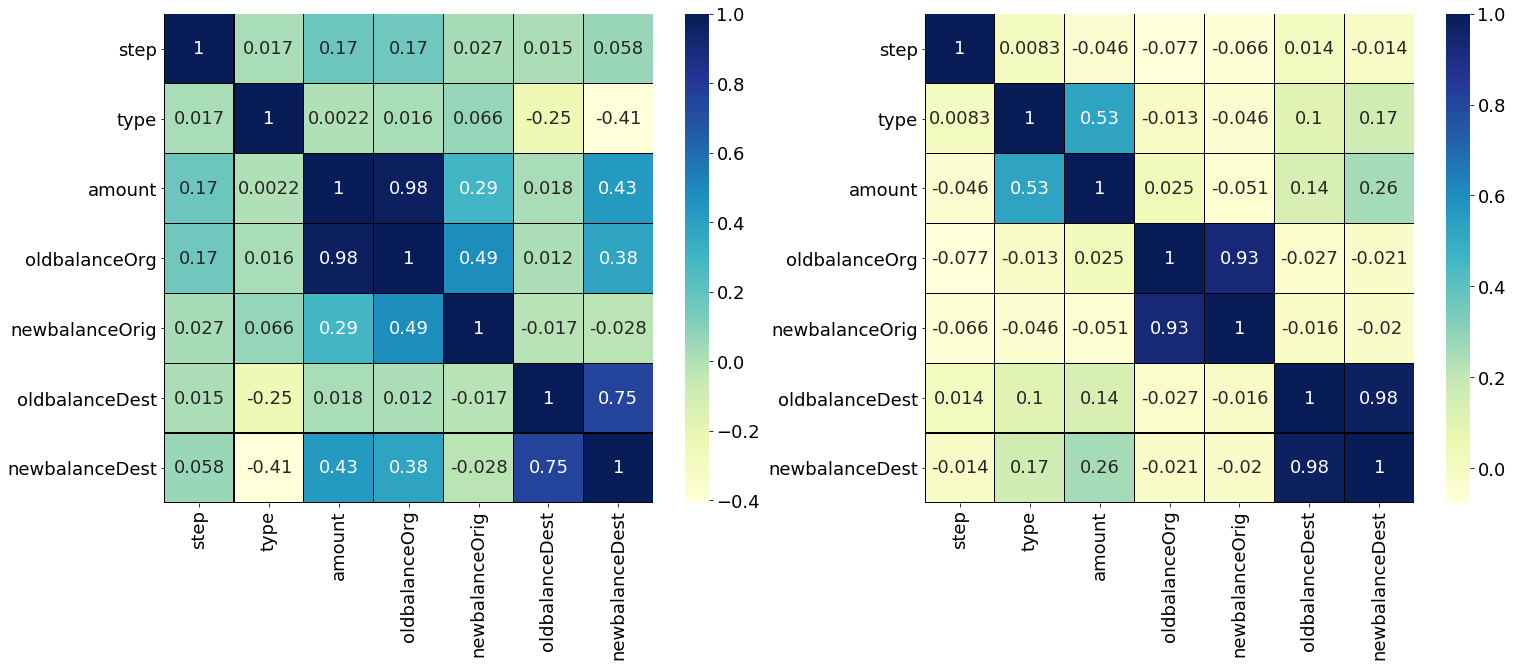

In [48]:
# affichage des corrélations entre variables
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25, 9))

Fraud_c = Fraud.loc[:, Fraud.columns != 'isFraud']
NotFraud_c = NotFraud.loc[:, NotFraud.columns != 'isFraud']

sns.heatmap(Fraud_c.corr(), ax=ax1, linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True);

sns.heatmap(NotFraud_c.corr(), ax=ax2, linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True);

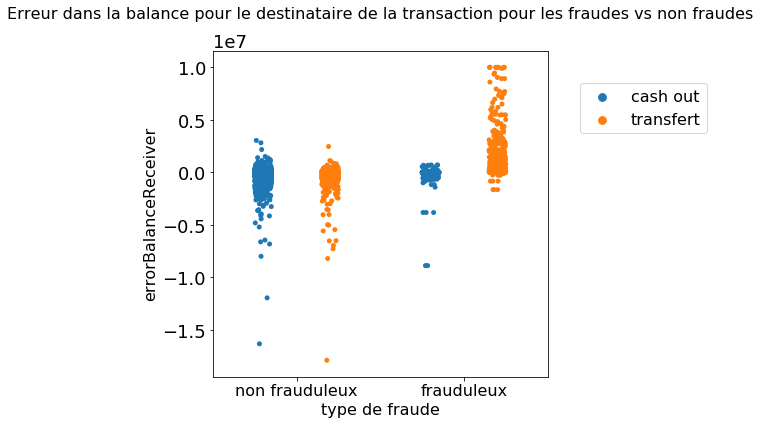

In [49]:
limit = len(d_model)
ax = PlotPoints(d_model.isFraud[:limit], d_model.errorBalanceReceiver[:limit], d_model.type[:limit])
ax.set_ylabel('errorBalanceReceiver', size = 16)
ax.set_title('Erreur dans la balance pour le destinataire de la transaction pour les fraudes vs non fraudes', size = 16, y=1.08);

* ErrorBalanceReceiver serait un fort prédicteur de fraude bancaire.

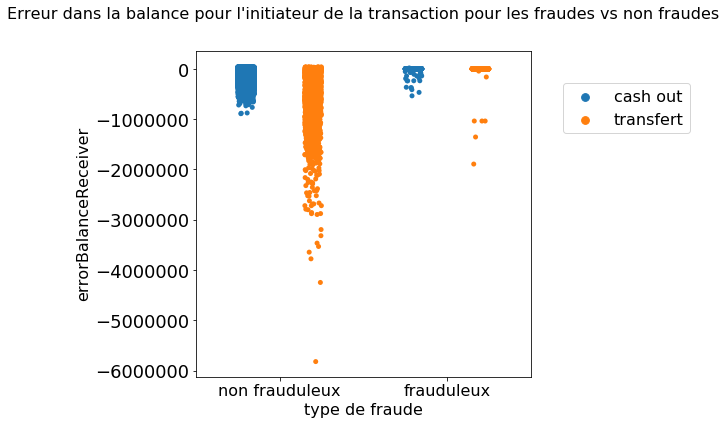

In [50]:
limit = len(d_model)
ax = PlotPoints(d_model.isFraud[:limit], d_model.errorBalanceSender[:limit], d_model.type[:limit])
ax.set_ylabel('errorBalanceReceiver', size = 16)
ax.set_title('Erreur dans la balance pour l\'initiateur de la transaction pour les fraudes vs non fraudes', size = 16, y=1.08);

In [51]:
def Plot3D (x, y, z) :
    
    Y = d_model['isFraud']

    zOffset = 0.02
    limit = len(d_model)

    sns.reset_orig() 

    fig = plt.figure(figsize = (10, 12))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(d_model.loc[Y == 0, x][:limit], d_model.loc[Y == 0, y][:limit], \
    (d_model.loc[Y == 0, z][:limit] + zOffset), c = 'g', marker = '.', \
    s = 1, label = 'non frauduleux')
    
    ax.scatter(d_model.loc[Y == 1, x][:limit], d_model.loc[Y == 1, y][:limit], \
    (d_model.loc[Y == 1, z][:limit] + zOffset), c = 'r', marker = '.', \
    s = 1, label = 'fraudulent')

    ax.set_xlabel(x, size = 16); 
    ax.set_ylabel(y, size = 16); 
    ax.set_zlabel(z, size = 16, labelpad=20)
    ax.set_title('Erreurs de la balance pour les transactions frauduleuses \
    et non frauduleuses', size = 20)

    from matplotlib import rcParams
    rcParams['axes.labelpad'] = 20
    
    plt.axis('tight')
    ax.grid(1)

    NotFraudMarker = mlines.Line2D([], [], linewidth = 0, color='g', marker='.',
                          markersize = 10, label='non frauduleux')
    fraudMarker = mlines.Line2D([], [], linewidth = 0, color='r', marker='.',
                          markersize = 10, label='frauduleux')

    
    plt.legend(handles = [NotFraudMarker, fraudMarker], \
           bbox_to_anchor = (1.40, 0.38 ), frameon = False, prop={'size': 16})

    return ax

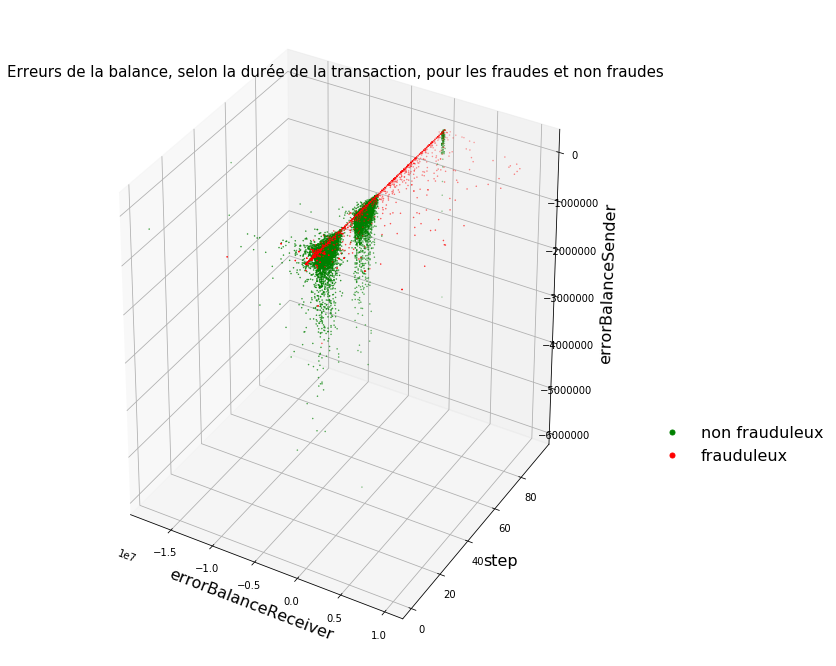

In [52]:
ax = Plot3D('errorBalanceReceiver', 'step', 'errorBalanceSender')
ax.set_title('Erreurs de la balance, selon la durée de la transaction, pour les fraudes et non fraudes', size=15, y=0.96);

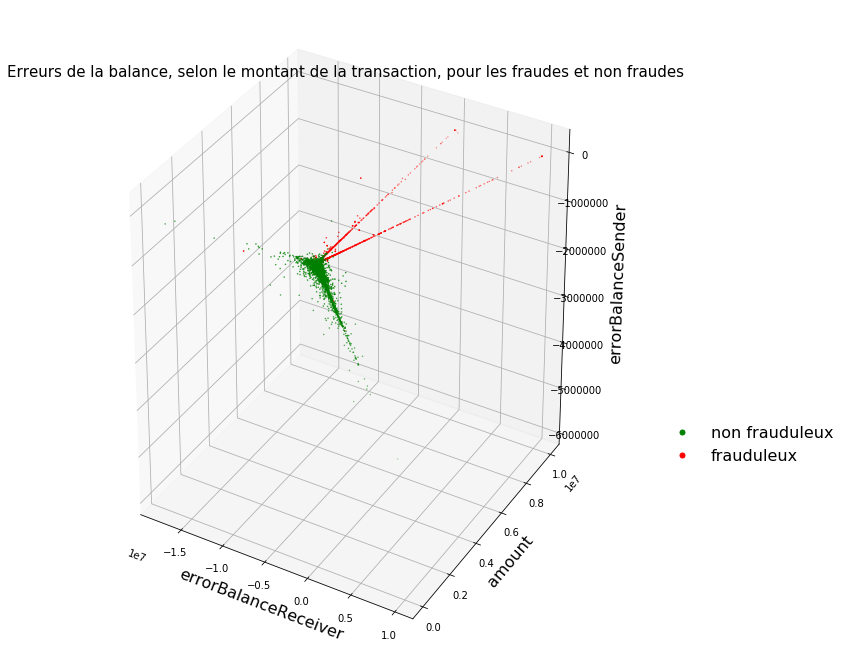

In [53]:
ax = Plot3D('errorBalanceReceiver', 'amount', 'errorBalanceSender')
ax.set_title('Erreurs de la balance, selon le montant de la transaction, pour les fraudes et non fraudes', size=15, y=0.96);

In [55]:
d_model.head()

,step,type,amount,balanceSender,balanceReceiver,isFraud,errorBalanceSender,errorBalanceReceiver
0,8,0,140116.48,0.0,532921.62,0,-98440.48,-145648.60
1,32,1,2023920.09,0.0,-1.00,1,0.00,2023920.09
2,94,0,299919.71,0.0,994725.55,0,-258243.71,0.00
3,13,0,249045.05,0.0,538506.68,0,-235409.93,0.01
4,44,0,309904.46,0.0,952164.98,0,-268228.46,-298821.81


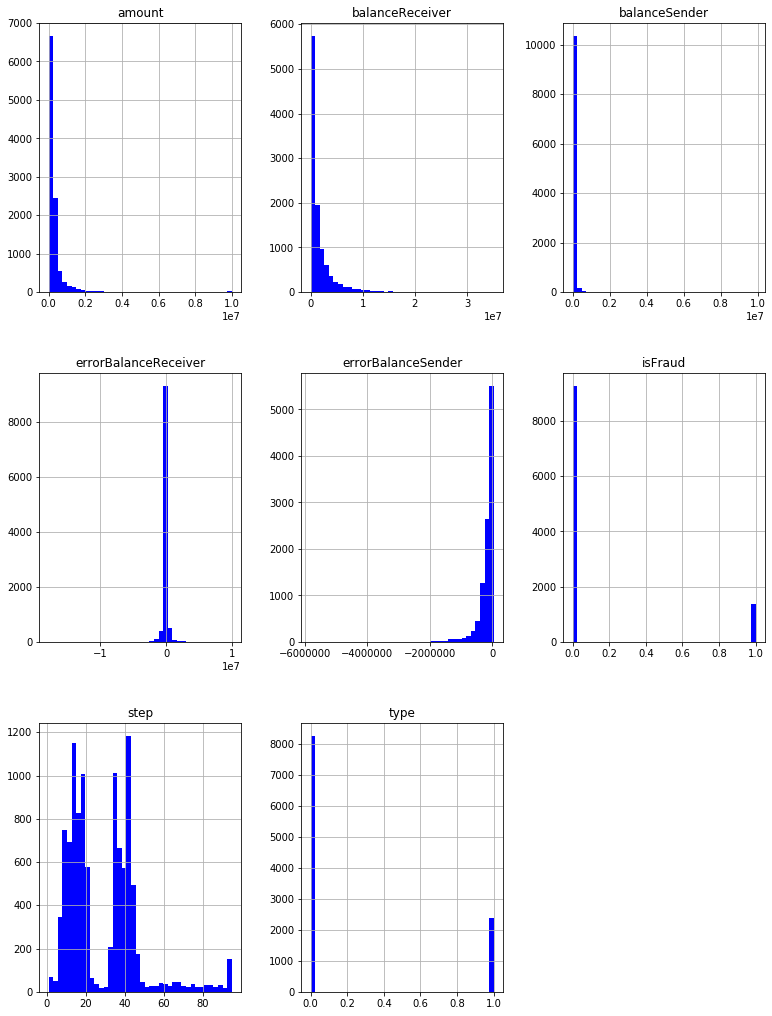

In [56]:
d_model.hist(figsize=(13,50),color='blue',bins=40,layout=(8,3))
plt.show()

Nous pouvons dorénavant commencer notre modèle.

<h1> 3. Machine learning pour détecter les fraudes </h1>

<h2> 3.1 Modèle de classification </h2>

In [57]:
d_model.head()

,step,type,amount,balanceSender,balanceReceiver,isFraud,errorBalanceSender,errorBalanceReceiver
0,8,0,140116.48,0.0,532921.62,0,-98440.48,-145648.60
1,32,1,2023920.09,0.0,-1.00,1,0.00,2023920.09
2,94,0,299919.71,0.0,994725.55,0,-258243.71,0.00
3,13,0,249045.05,0.0,538506.68,0,-235409.93,0.01
4,44,0,309904.46,0.0,952164.98,0,-268228.46,-298821.81


In [58]:
# y variable dépendante et X variables indépendantes
X = d_model.iloc[:, d_model.columns !='isFraud'].values
y = d_model.iloc[:, 5].values

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print (X_train.shape,y_train.shape)
print (X_test.shape, y_test.shape)

(8512, 7) (8512,)
(2128, 7) (2128,)


In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
train = pd.DataFrame(X_train)

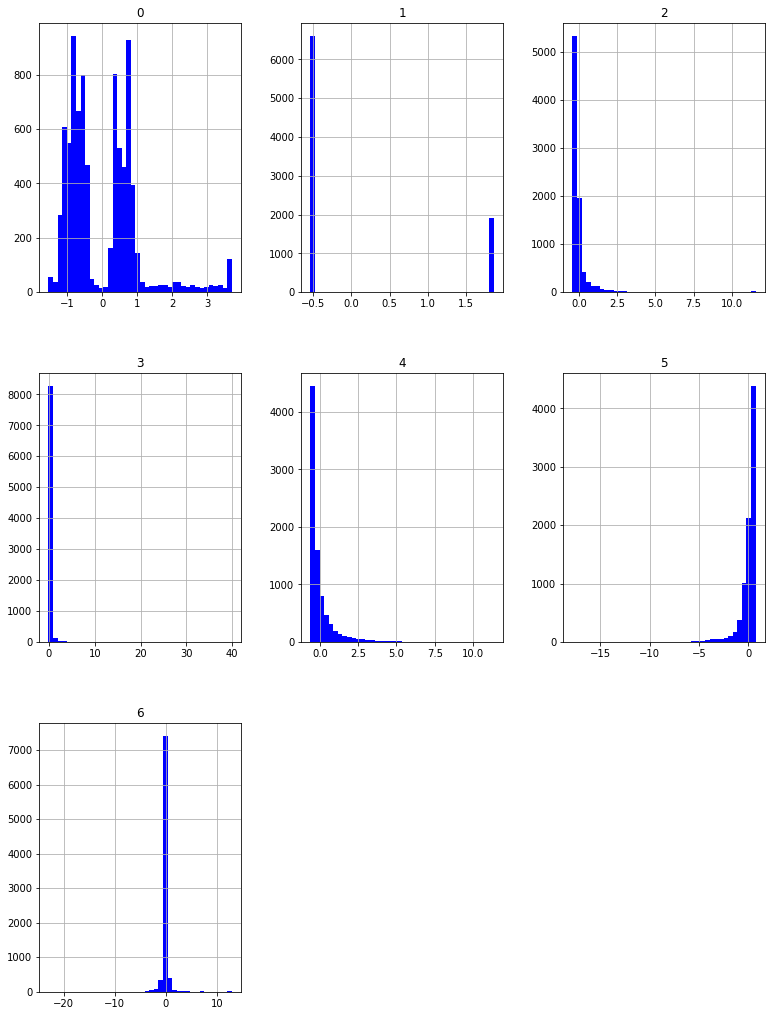

In [62]:
train.hist(figsize=(13,50),color='blue',bins=40,layout=(8,3))
plt.show()

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: 
pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners:param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = []
    models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          
          ('SVM', SVC()), 
       
          ('XGB', XGBClassifier())
        ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['fraude', 'nonfraude']
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_train)
        print(name)
        print(classification_report(y_train, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)
    return final

In [64]:
final = run_exps(X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

      fraude       0.95      0.99      0.97      7428
   nonfraude       0.91      0.65      0.75      1084

    accuracy                           0.95      8512
   macro avg       0.93      0.82      0.86      8512
weighted avg       0.94      0.95      0.94      8512

RF
              precision    recall  f1-score   support

      fraude       1.00      1.00      1.00      7428
   nonfraude       1.00      1.00      1.00      1084

    accuracy                           1.00      8512
   macro avg       1.00      1.00      1.00      8512
weighted avg       1.00      1.00      1.00      8512

SVM
              precision    recall  f1-score   support

      fraude       0.97      0.99      0.98      7428
   nonfraude       0.95      0.76      0.85      1084

    accuracy                           0.96      8512
   macro avg       0.96      0.88      0.91      8512
weighted avg       0.96      0.96      0.96      8512

XGB
 

In [65]:
run_exps(X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

      fraude       0.95      0.99      0.97      7428
   nonfraude       0.91      0.65      0.75      1084

    accuracy                           0.95      8512
   macro avg       0.93      0.82      0.86      8512
weighted avg       0.94      0.95      0.94      8512

RF
              precision    recall  f1-score   support

      fraude       1.00      1.00      1.00      7428
   nonfraude       1.00      1.00      1.00      1084

    accuracy                           1.00      8512
   macro avg       1.00      1.00      1.00      8512
weighted avg       1.00      1.00      1.00      8512

SVM
              precision    recall  f1-score   support

      fraude       0.97      0.99      0.98      7428
   nonfraude       0.95      0.76      0.85      1084

    accuracy                           0.96      8512
   macro avg       0.96      0.88      0.91      8512
weighted avg       0.96      0.96      0.96      8512

XGB
 

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.089050,0.017014,0.946565,0.946329,0.946565,0.942091,0.948960,LogReg
1,0.077017,0.022988,0.947739,0.946348,0.947739,0.943371,0.966143,LogReg
2,0.056968,0.023017,0.937133,0.935268,0.937133,0.931886,0.942856,LogReg
3,0.064961,0.016990,0.946533,0.945321,0.946533,0.942548,0.950788,LogReg
4,0.076470,0.014990,0.952409,0.950283,0.952409,0.949812,0.952727,LogReg
5,2.712897,0.249856,0.998238,0.998237,0.998238,0.998237,0.994641,RF
6,2.420095,0.166790,0.997651,0.997657,0.997651,0.997641,0.990752,RF
7,1.760661,0.150914,0.996475,0.996472,0.996475,0.996462,0.987100,RF
8,1.757306,0.160903,0.995887,0.995886,0.995887,0.995867,0.986088,RF
9,2.212144,0.190898,0.999412,0.999413,0.999412,0.999412,0.996836,RF


In [66]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: 
pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners:param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = []
    models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          
          ('SVM', SVC()), 
       
          ('XGB', XGBClassifier())
        ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['fraude', 'nonfraude']
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)
    return final

In [67]:
run_exps(X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

      fraude       0.95      0.99      0.97      1840
   nonfraude       0.93      0.64      0.76       288

    accuracy                           0.94      2128
   macro avg       0.94      0.81      0.86      2128
weighted avg       0.94      0.94      0.94      2128

RF
              precision    recall  f1-score   support

      fraude       1.00      1.00      1.00      1840
   nonfraude       1.00      0.99      0.99       288

    accuracy                           1.00      2128
   macro avg       1.00      1.00      1.00      2128
weighted avg       1.00      1.00      1.00      2128

SVM
              precision    recall  f1-score   support

      fraude       0.96      1.00      0.98      1840
   nonfraude       0.97      0.77      0.86       288

    accuracy                           0.97      2128
   macro avg       0.97      0.88      0.92      2128
weighted avg       0.97      0.97      0.96      2128

XGB
 

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.100944,0.019989,0.946565,0.946329,0.946565,0.942091,0.948960,LogReg
1,0.069960,0.018989,0.947739,0.946348,0.947739,0.943371,0.966143,LogReg
2,0.078965,0.022987,0.937133,0.935268,0.937133,0.931886,0.942856,LogReg
3,0.074955,0.023986,0.946533,0.945321,0.946533,0.942548,0.950788,LogReg
4,0.072960,0.018990,0.952409,0.950283,0.952409,0.949812,0.952727,LogReg
5,1.951212,0.219873,0.998238,0.998237,0.998238,0.998237,0.994569,RF
6,2.242196,0.192919,0.997651,0.997657,0.997651,0.997641,0.990092,RF
7,1.787822,0.157890,0.996475,0.996472,0.996475,0.996462,0.987246,RF
8,1.869936,0.160915,0.995887,0.995886,0.995887,0.995867,0.983849,RF
9,1.801262,0.167884,0.999412,0.999413,0.999412,0.999412,0.996861,RF


In [68]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics#

# PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df 
#with fit data
results_long_fit = results_long_fit.sort_values(by='values')

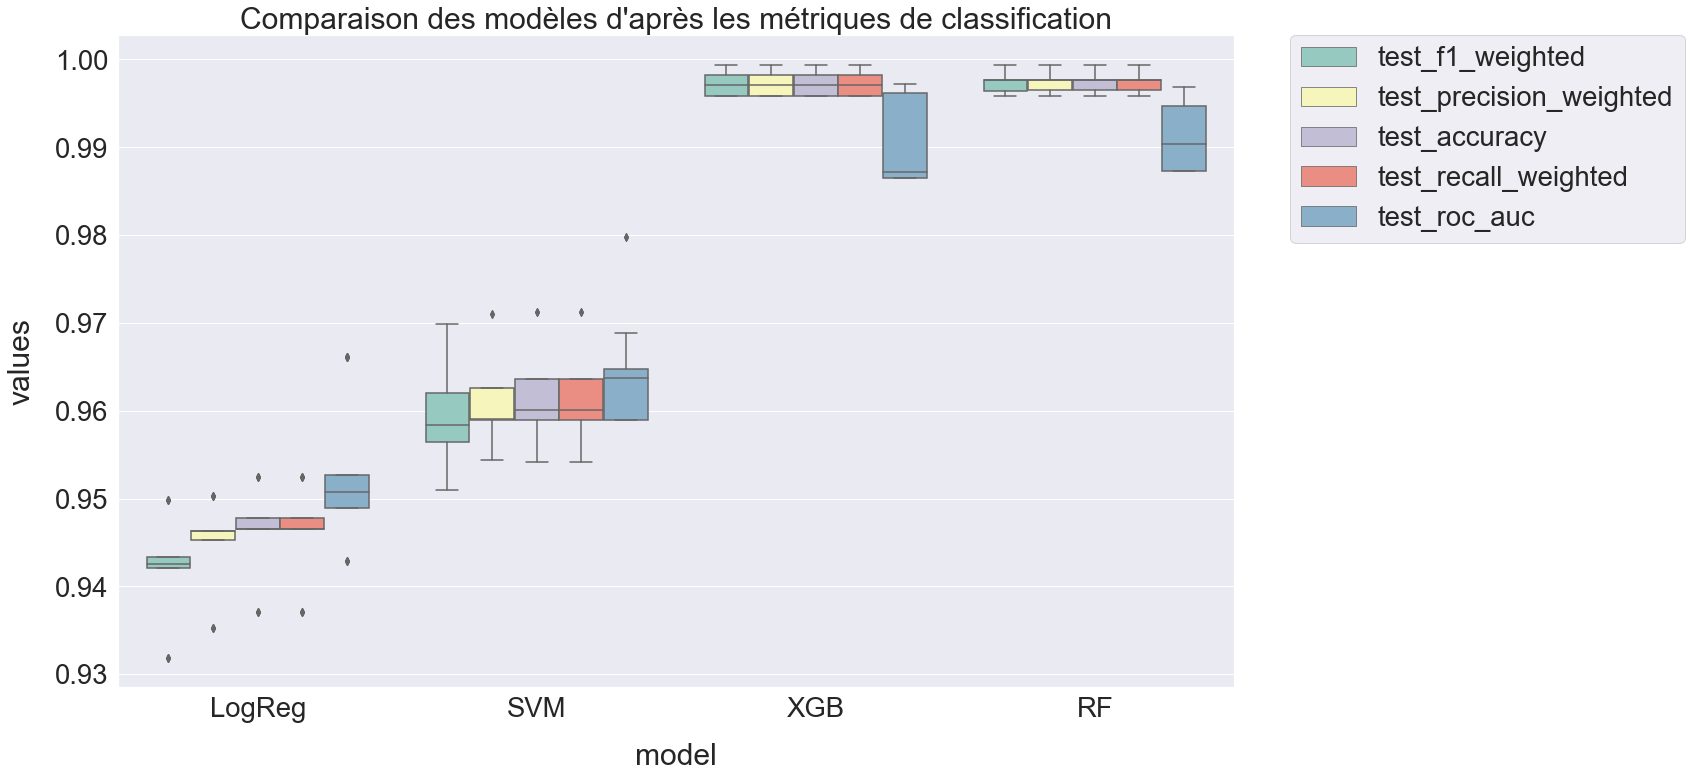

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparaison des modèles d\'après les métriques de classification')
plt.savefig('./benchmark_models_performance.png',dpi=300)

In [70]:
"""n_estimators = le nombre d'arbres dans la fôrét"""
"""Le Bootstrapping est un procédé qui permet d’augmenter artificiellement le nombre d’observation d’un 
échantillon de données sans pour autant modifier la distribution des variables présentes dans le jeu de 
données. Le principe est simple, on dispose d’un jeu de données contenant n observations, pour créer un 
échantillon de taille n on tire avec remise n observations parmi le jeu de données original"""
param_grid = {'max_depth' : [3, 6, 9, 15, 20, 50],
             'n_estimators' : [3, 5, 20, 50, 200],
              'bootstrap' : [True, False],
              'criterion' : ['gini', 'entropy']}

rfc = RandomForestClassifier(random_state=90210)

rfc_grid = GridSearchCV(rfc, param_grid, cv = 5)

%time CV_rfc=rfc_grid.fit(X_train, y_train)

print(rfc_grid.best_score_.round(5))
print(rfc_grid.best_params_)

rf = rfc_grid.best_estimator_

pred_train = rf.predict(X_train) 
pred_test = rf.predict(X_test)

Wall time: 14min 24s
0.99742
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'n_estimators': 50}


In [71]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7428
           1       1.00      1.00      1.00      1084

    accuracy                           1.00      8512
   macro avg       1.00      1.00      1.00      8512
weighted avg       1.00      1.00      1.00      8512



In [72]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1840
           1       1.00      0.99      0.99       288

    accuracy                           1.00      2128
   macro avg       1.00      1.00      1.00      2128
weighted avg       1.00      1.00      1.00      2128



In [74]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [75]:
parameters = {
    'max_depth': range (2, 50, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [76]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    n_jobs = 10,
    cv = 5
)

In [77]:
%time xgboost = grid_search.fit(X_train, y_train)

Wall time: 1h 23min


In [78]:
print(xgboost.best_score_.round(5))
print(xgboost.best_params_)

xgb = xgboost.best_estimator_

pred_train = xgb.predict(X_train) 
pred_test = xgb.predict(X_test)

0.99742
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 180}


In [79]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7428
           1       1.00      0.99      0.99      1084

    accuracy                           1.00      8512
   macro avg       1.00      0.99      1.00      8512
weighted avg       1.00      1.00      1.00      8512



In [80]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1840
           1       1.00      0.99      0.99       288

    accuracy                           1.00      2128
   macro avg       1.00      1.00      1.00      2128
weighted avg       1.00      1.00      1.00      2128



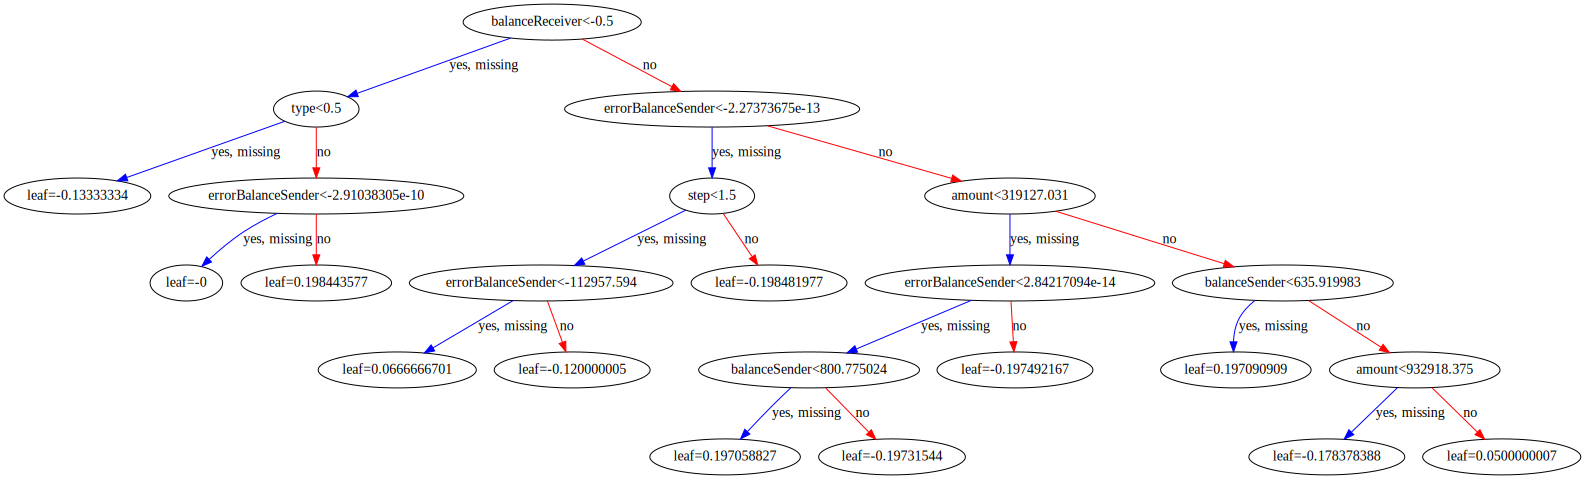

In [81]:
# y variable dépendante et X variables indépendantes
X = d_model.iloc[:, d_model.columns !='isFraud']
y = d_model.iloc[:, 5]
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2, \
                                                random_state = 0)
clf = XGBClassifier(max_depth=7, learning_rate=0.1, n_estimators=180, objective='binary:logistic', nthread=4,
    seed=42)
probabilities = clf.fit(trainX, trainY).predict_proba(testX)
to_graphviz(clf)

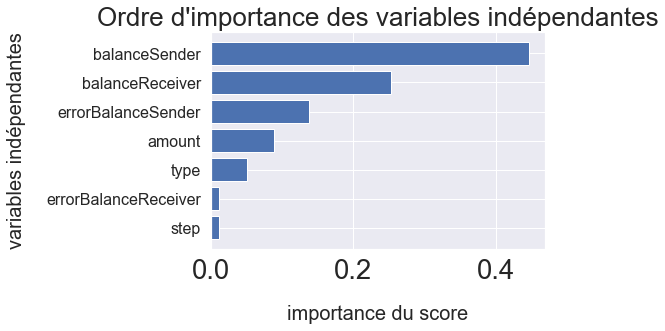

In [82]:
# y variable dépendante et X variables indépendantes
from xgboost import plot_importance
X = d_model.iloc[:, d_model.columns !='isFraud']
Y = d_model.iloc[:, 5]

X_t = pd.DataFrame(X_train)
feature_importances = pd.DataFrame(clf.feature_importances_, index = X.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

features = X.columns
importances=clf.feature_importances_
indices=np.argsort(importances)
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices], size=16)
plt.xlabel('importance du score', size=20);
plt.ylabel('variables indépendantes', size=20);
plt.title('Ordre d\'importance des variables indépendantes', size=26);
plt.show()

In [124]:
def MatriceConfusion (model):
    y_pred = model.predict(X_test)
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.matshow(cm)
    plt.title('Matrice de confusion', y=1)
    plt.colorbar()
    print(cm)
    plt.show()

[[1839    1]
 [   2  286]]


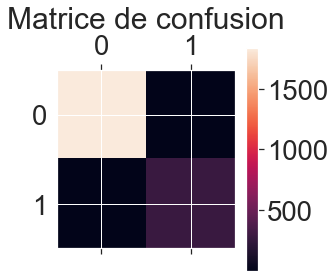

In [125]:
y_pred = MatriceConfusion(xgb)

[[1839    1]
 [   2  286]]


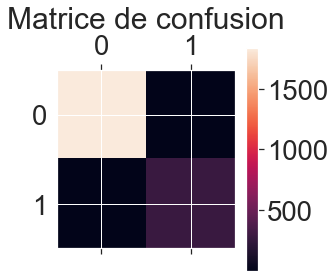

In [126]:
y_pred = MatriceConfusion(rf)

<h2> 3.2 Deep learning </h2>

In [90]:
d_model = pd.read_csv('DatasetMachineLearning.csv')
#d_model = d_model.drop(columns=['Unnamed: 0'])
d_model.head()

,step,type,amount,balanceSender,balanceReceiver,isFraud,errorBalanceSender,errorBalanceReceiver
0,8,0,140116.48,0.0,532921.62,0,-98440.48,-145648.60
1,32,1,2023920.09,0.0,-1.00,1,0.00,2023920.09
2,94,0,299919.71,0.0,994725.55,0,-258243.71,0.00
3,13,0,249045.05,0.0,538506.68,0,-235409.93,0.01
4,44,0,309904.46,0.0,952164.98,0,-268228.46,-298821.81


In [91]:
# y variable dépendante et X variables indépendantes
X = d_model.iloc[:, d_model.columns !='isFraud'].values
y = d_model.iloc[:, 5].values

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print (X_train.shape,y_train.shape)
print (X_test.shape, y_test.shape)

(8512, 7) (8512,)
(2128, 7) (2128,)


In [93]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test.shape, X_train.shape

((2128, 7), (8512, 7))

In [94]:
X_train = X_train.reshape(8512, 7, 1)
X_test = X_test.reshape(2128, 7, 1)

In [95]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(7,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool1D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 7, 32)             96        
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 32)             128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 32)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 96)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                6208      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

In [96]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
266/266 [==============================] - 3s 10ms/step - loss: 0.5724 - accuracy: 0.7452 - val_loss: 0.4540 - val_accuracy: 0.8994
Epoch 2/25
266/266 [==============================] - 2s 7ms/step - loss: 0.3493 - accuracy: 0.8871 - val_loss: 0.2790 - val_accuracy: 0.9239
Epoch 3/25
266/266 [==============================] - 2s 8ms/step - loss: 0.2940 - accuracy: 0.9081 - val_loss: 0.2353 - val_accuracy: 0.9328
Epoch 4/25
266/266 [==============================] - 2s 8ms/step - loss: 0.2655 - accuracy: 0.9176 - val_loss: 0.2143 - val_accuracy: 0.9436
Epoch 5/25
266/266 [==============================] - 2s 9ms/step - loss: 0.2441 - accuracy: 0.9205 - val_loss: 0.1980 - val_accuracy: 0.9464
Epoch 6/25
266/266 [==============================] - 2s 8ms/step - loss: 0.2256 - accuracy: 0.9282 - val_loss: 0.1825 - val_accuracy: 0.9530
Epoch 7/25
266/266 [==============================] - 2s 8ms/step - loss: 0.2160 - accuracy: 0.9297 - val_loss: 0.1749 - val_accuracy: 0.9535
Epoch

In [97]:
y_pred=np.argmax(model.predict(X_test), axis=-1)

In [98]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [99]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [100]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1833    7]
 [  75  213]]


In [101]:
def learning_curve(history, epoch):
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

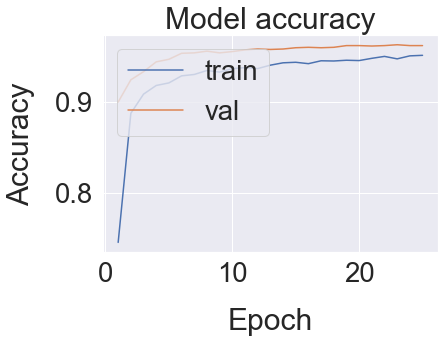

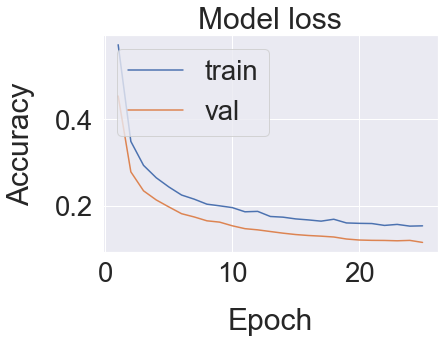

In [102]:
epoch=5
learning_curve(history, 25)

In [104]:
d_model = pd.read_csv('DatasetMachineLearning.csv')
#d_model = d_model.drop(columns=['Unnamed: 0'])
d_model.head()
# y variable dépendante et X variables indépendantes
X = d_model.iloc[:, d_model.columns !='isFraud'].values
y = d_model.iloc[:, 5].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print (X_train.shape,y_train.shape)
print (X_test.shape, y_test.shape)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test.shape, X_train.shape

(8512, 7) (8512,)
(2128, 7) (2128,)


((2128, 7), (8512, 7))

In [105]:
model = Sequential([
Dense(input_dim = 7, units = 16, activation = 'relu'),
Dense(units = 24, activation = 'relu'),
Dropout(0.5),
Dense(units = 20, activation = 'relu'),
Dense(units = 10, activation = 'relu'),
Dense(units =1, activation = 'sigmoid'),])

In [106]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 50, epochs = 10)

Epoch 1/10
171/171 [==============================] - 1s 5ms/step - loss: 0.4124 - accuracy: 0.8630
Epoch 2/10
171/171 [==============================] - 1s 5ms/step - loss: 0.2542 - accuracy: 0.9070
Epoch 3/10
171/171 [==============================] - 1s 5ms/step - loss: 0.1850 - accuracy: 0.9391
Epoch 4/10
171/171 [==============================] - 1s 5ms/step - loss: 0.1556 - accuracy: 0.9496
Epoch 5/10
171/171 [==============================] - 1s 5ms/step - loss: 0.1466 - accuracy: 0.9529
Epoch 6/10
171/171 [==============================] - 1s 5ms/step - loss: 0.1345 - accuracy: 0.9551
Epoch 7/10
171/171 [==============================] - 1s 5ms/step - loss: 0.1293 - accuracy: 0.9568
Epoch 8/10
171/171 [==============================] - 1s 5ms/step - loss: 0.1159 - accuracy: 0.9615
Epoch 9/10
171/171 [==============================] - 1s 5ms/step - loss: 0.1205 - accuracy: 0.9602
Epoch 10/10
171/171 [==============================] - 1s 6ms/step - loss: 0.1199 - accuracy: 0.9619

In [107]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)

In [108]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)

Accuracy: 0.970395
Precision: 0.962963
Recall: 0.812500
F1 score: 0.881356
ROC AUC: 0.981992


In [109]:
cols = ['Accuracy','Precision','Recall','F1 score','ROC AUC']
resul = pd.DataFrame(columns=cols)
#resul.set_index("Métrique",inplace=True)
resul.loc['Scores'] = [0.977444,0.954545,0.875000,0.913043,0.990191]
resul.head()

,Accuracy,Precision,Recall,F1 score,ROC AUC
Scores,0.977444,0.954545,0.875,0.913043,0.990191


In [110]:
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

[[1831    9]
 [  54  234]]


In [112]:
d_model = pd.read_csv('DatasetMachineLearning.csv')
#d_model = d_model.drop(columns=['Unnamed: 0'])
d_model.head()
# y variable dépendante et X variables indépendantes
X = d_model.iloc[:, d_model.columns !='isFraud'].values
y = d_model.iloc[:, 5].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print (X_train.shape,y_train.shape)
print (X_test.shape, y_test.shape)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test.shape, X_train.shape

(8512, 7) (8512,)
(2128, 7) (2128,)


((2128, 7), (8512, 7))

In [113]:
som = MiniSom(x=10, y=10, input_len=7, sigma=1.0, learning_rate=0.3)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

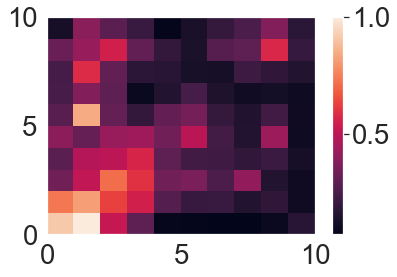

In [114]:
plt.pcolor(som.distance_map().T)
plt.colorbar()
plt.show()